In [1]:
!pip install face_recognition
!pip install pillow
!pip install numpy

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=56bd044a0a82428e3c5ec3fb9732d31eda8252f59a7be4622ea4eb35a46696a9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [7]:
#face detection part
import face_recognition
image = face_recognition.load_image_file('./3ppl.jpg') #load image
face_locations = face_recognition.face_locations(image) #detect face

#Array of coords of each face
print(face_locations)
print(f'There are {len(face_locations)} people in this image')

[(160, 716, 345, 531), (180, 304, 366, 118), (201, 1191, 387, 1005)]
There are 3 people in this image


In [4]:
#face recognition part
import face_recognition
obama_1=face_recognition.load_image_file('./obama.jpg')
#feature extractor
obama_1_encoding = face_recognition.face_encodings(obama_1)[0] 

unknown_im=face_recognition.load_image_file('./biden.jpg')
unknown_im_encoding = face_recognition.face_encodings(unknown_im)[0]

# feature compare
results = face_recognition.compare_faces([obama_1_encoding],unknown_im_encoding,tolerance=0.1)
if results[0]:
  print('This is obama')
else:
  print('This is not obama')

This is not obama


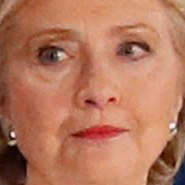

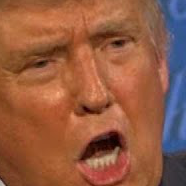

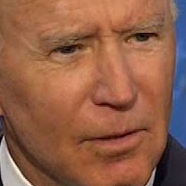

In [8]:
# face detection and show the part of face
from PIL import Image
import face_recognition
image = face_recognition.load_image_file('./3ppl.jpg')
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
  top, right, bottom, left = face_location

  face_image = image[top:bottom, left:right]
  pil_image = Image.fromarray(face_image)
  display(pil_image)
  pil_image.save(f'{top}.jpg')

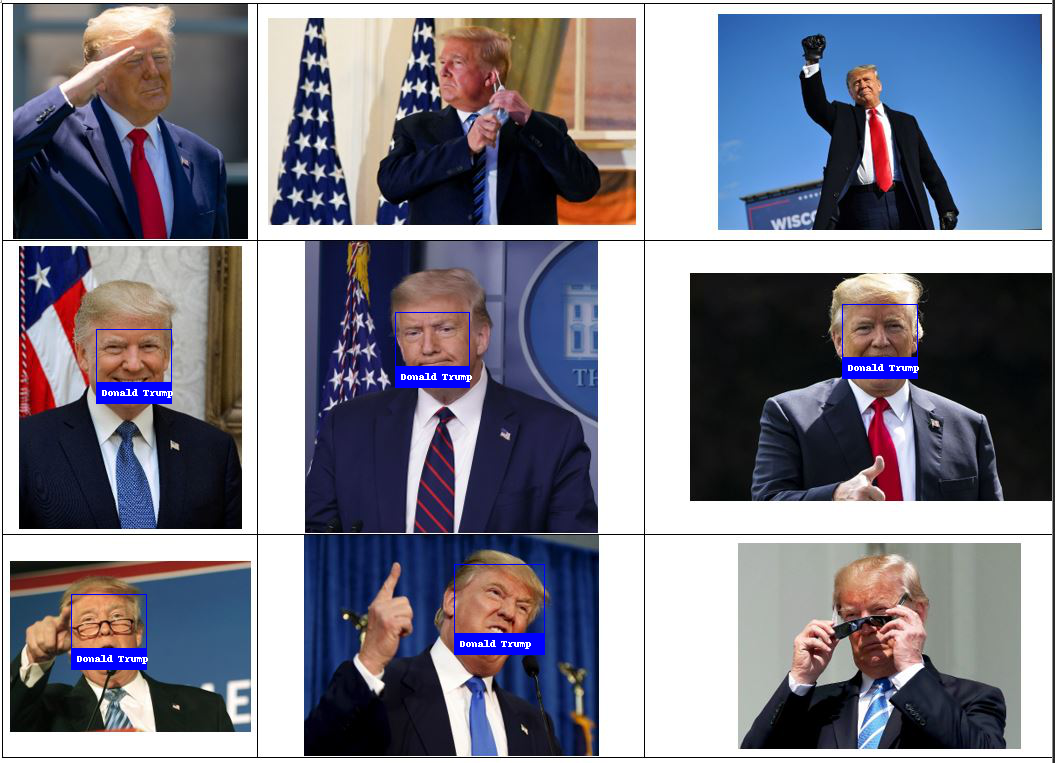

In [18]:
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.
import face_recognition
from PIL import Image, ImageDraw
import numpy as np



# Load a sample picture and get the feature.
trump_image = face_recognition.load_image_file("sample_t1.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

# Load a second sample picture and get the feature.
woods_image = face_recognition.load_image_file("sample_tw1.jpg")
woods_face_encoding = face_recognition.face_encodings(woods_image)[0]

# Create arrays of known face feature and their names
known_face_encodings = [
    trump_face_encoding,
    woods_face_encoding
]
known_face_names = [
    "Donald Trump",
    "Tiger Woods"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("./gallery_set/Trump_all.JPG")

# Find all the faces and face features in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance=0.95)
    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
pil_image.save("imagebox_trump_095.jpg")

In [39]:
# Feature Distances
import dlib
face_detector = dlib.get_frontal_face_detector()

def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)

def face_locations(img, number_of_times_to_upsample=1, model="hog"):

  if model == "cnn":
    return [_trim_css_to_bounds(_rect_to_css(face.rect), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, "cnn")]
  else:
    return [_trim_css_to_bounds(_rect_to_css(face), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample, model)]

def _raw_face_landmarks(face_image, face_locations=None, model="large"):
  if face_locations is None:
    face_locations = _raw_face_locations(face_image)
  else:
    face_locations = [_css_to_rect(face_location) for face_location in face_locations]
    pose_predictor = pose_predictor_68_point #dlib.shape_predictor(predictor_68_point_model)
  if model == "small":
    pose_predictor = pose_predictor_5_point #dlib.shape_predictor(predictor_5_point_model)
  
  return [pose_predictor(face_image, face_location) for face_location in face_locations]

def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):

  raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
  return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for
raw_landmark_set in raw_landmarks]
  #face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

def _rect_to_css(rect):
  return rect.top(), rect.right(), rect.bottom(), rect.left()


def _css_to_rect(css):
  return dlib.rectangle(css[3], css[0], css[1], css[2])

def _trim_css_to_bounds(css, image_shape):
  return max(css[0], 0), min(css[1], image_shape[1]), min(css[2], image_shape[0]), max(css[3], 0)


def face_distance(face_encodings, face_to_compare):

  if len(face_encodings) == 0:
    return np.empty((0))
  return np.linalg.norm(face_encodings - face_to_compare, axis=1)

In [40]:
img = face_recognition.load_image_file('./sample_t1.jpg')
face_image = face_recognition.load_image_file('./sample_t1.jpg')
number_of_times_to_upsample=1
model="hog"

DT = face_locations(img)
DT = _raw_face_landmarks()
DT = face_encodings()

PJvsDT = face_distance(DT, "PJirayu.jpg")



#########################################
# Can't find the "_raw_face_locations function to apply in code"
##########################################

TypeError: ignored